In [2]:
#import library
import pandas as pd
import numpy as np

In [3]:
#mengganti excel ke csv
read_file = pd.read_excel(r"C:\Users\GF63\Downloads\Property Dataset - Clustering.xlsx",sheet_name='Data Rumah')
read_file.to_csv(r"C:\Users\GF63\Downloads\Property Dataset - Clustering.csv",index = None, header= True)

In [4]:
#import data set
url = (r"C:\Users\GF63\Downloads\Property Dataset - Clustering.csv")
dt = pd.read_csv(url)
dt = dt.iloc[1: , :]
dt

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [5]:
#cek data duplicate
dt.duplicated().sum()

2

In [6]:
#handling duplicate data
dt.drop_duplicates(keep=False, inplace=True)
dt.duplicated().sum()

0

In [7]:
#cek data kosong
dt.isna().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [8]:
#random data dari array opsi
import random
arah = ["Utara","Selatan","Timur","Barat"]
print(random.choice(arah))
posisi = ["Tusuk Sate","Tikungan/Hook","Tusuk Belakang/Membelakangi Jalan","Kantong Belakang/Ngantong","Standard","Cul De Sac/Ujung Gang Buntu"]
print(random.choice(posisi))
lebar = ["< 1 Mobil","1-2 Mobil","> 2 Mobil"]
print(random.choice(lebar))

Barat
Kantong Belakang/Ngantong
> 2 Mobil


In [9]:
#menginput missing value
dt.dropna(subset=["Jumlah Kamar Mandi"],inplace=True)
dt.dropna(subset=["Tingkat/Lantai "],inplace=True)
dt["Arah Hadap Rumah"] = dt['Arah Hadap Rumah'].fillna(random.choice(arah))
dt["Posisi Rumah"] = dt['Posisi Rumah'].fillna(random.choice(posisi))
dt["Lebar Jalan Depan Rumah (ROW)"] = dt['Lebar Jalan Depan Rumah (ROW)'].fillna(random.choice(lebar))

In [10]:
#cek missing value setelah di input
dt.isna().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [11]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

dt['Area Category'] = lb.fit_transform(dt['Area Category'])
dt['Nama Daerah'] = lb.fit_transform(dt['Nama Daerah'])
dt['Luas Tanah (m2)'] = lb.fit_transform(dt['Luas Tanah (m2)'])
dt['Luas Bangunan (m2)'] = lb.fit_transform(dt['Luas Bangunan (m2)'])
dt['Jumlah Kamar'] = lb.fit_transform(dt['Jumlah Kamar'])
dt['Jumlah Kamar Mandi'] = lb.fit_transform(dt['Jumlah Kamar Mandi'])
dt["Tingkat/Lantai "] = lb.fit_transform(dt["Tingkat/Lantai "])
dt['Harga Penawaran (dari Owner)'] = lb.fit_transform(dt['Harga Penawaran (dari Owner)'])
dt['Terjual/Belum'] = lb.fit_transform(dt['Terjual/Belum'])
dt['Arah Hadap Rumah'] = lb.fit_transform(dt['Arah Hadap Rumah'])
dt['Posisi Rumah'] = lb.fit_transform(dt['Posisi Rumah'])
dt['Lebar Jalan Depan Rumah (ROW)'] = lb.fit_transform(dt['Lebar Jalan Depan Rumah (ROW)'])
#Area Category 0 = Below Standard, 1 = Premium, 2 = Sangat Premium, 3 = Standard
#Terjual/Belum 0 = Belum, 1 = Sudah
#Posisi Rumah 0 = Ujung Gang Buntu, 1 = Ngantong, 2 = Standard, 3 = Tikungan, 4 = Tusuk Belakang, 5 = Tusuk Sate

In [12]:
#scaling
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()
df_scale = sd_scaler.fit_transform(dt.to_numpy())
df_scale = pd.DataFrame(df_scale, columns=['Area Category','Nama Daerah','Luas Tanah (m2)','Luas Bangunan (m2)','Jumlah Kamar','Jumlah Kamar Mandi','Tingkat/Lantai','Harga Penawaran (dari Owner)','Terjual/Belum','Arah Hadap Rumah','Posisi Rumah','Lebar Jalan Depan Rumah (ROW)'])
df_scale.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,-1.668737,1.031854,-1.682702,1.113995,-1.411036,-1.484438,0.290104,-0.073272,0.0,-1.128544,-0.784221,-0.054423
1,1.022102,-0.352105,0.061014,-0.777349,0.465496,0.422315,0.290104,-0.180334,0.0,-0.287723,-4.281267,-1.078256
2,0.125155,-0.352105,0.173512,-0.232872,0.465496,1.057899,0.290104,0.033790,0.0,1.393920,-0.784221,-1.078256
3,-0.771791,-0.352105,1.017245,1.142651,0.465496,1.057899,0.290104,0.890288,0.0,-1.128544,-0.784221,-1.078256
4,-0.771791,-0.352105,1.354739,0.970711,0.465496,1.693484,0.290104,-1.657792,0.0,-1.128544,-0.784221,-1.078256


K- MEANS CLUSTERING

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,max_iter=300,random_state=42)

model = kmeans.fit_predict(df_scale)
model
dt['K-MEANS'] = model
dt

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS
1,0,98,5,95,1,0,2,79,0,0,2,1,2
2,3,48,67,29,4,3,2,74,0,1,0,0,0
3,2,48,71,48,4,4,2,84,0,3,2,0,1
4,1,48,101,96,4,4,2,124,0,0,2,0,1
5,1,48,113,90,4,5,2,5,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,10,64,1,0,0,114,0,3,3,2,2
304,2,103,93,37,3,3,0,125,0,1,3,2,0
305,1,72,40,23,3,1,2,50,0,1,2,0,0
306,3,103,38,29,3,2,2,30,0,0,2,2,0


c:\Users\GF63\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


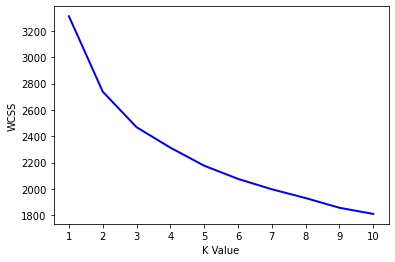

In [14]:
from matplotlib import pyplot as plt
wcss=[]
X2=df_scale
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [15]:
from kneed import KneeLocator
findknee = KneeLocator(range(1,11), wcss, curve="convex",direction="decreasing")
print("The best K Value for you model is", findknee.elbow)

The best K Value for you model is 3


In [17]:
#Kesimpulan
dt.groupby('K-MEANS').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
K-MEANS,,,,,,,,,,,,,
0,3,72,52.301587,26.063492,2.793651,1.825397,1.611111,64.761905,0,0,2,0.873016,126
1,1,11,95.354839,68.895161,4.508065,3.588710,2.064516,95.895161,0,3,3,1.338710,124
2,3,11,21.568627,99.352941,1.352941,0.549020,1.058824,93.294118,0,0,2,0.803922,51


DENDOGRAM HIERECHICAL

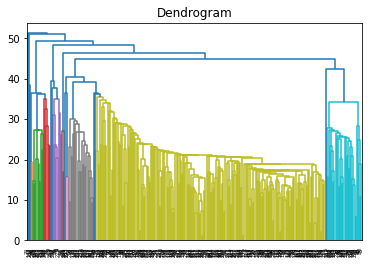

In [ ]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(dt, method = 'single'))
plt.title('Dendrogram')
plt.show()

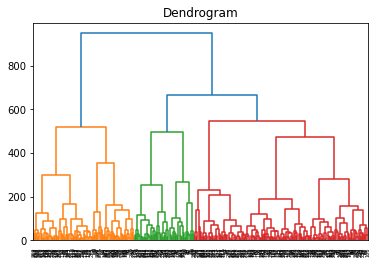

In [ ]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(dt, method = 'ward'))
plt.title('Dendrogram')
plt.show()

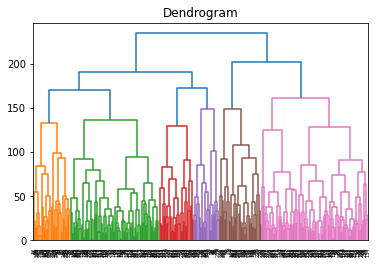

In [ ]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(dt, method = 'complete'))
plt.title('Dendrogram')
plt.show()

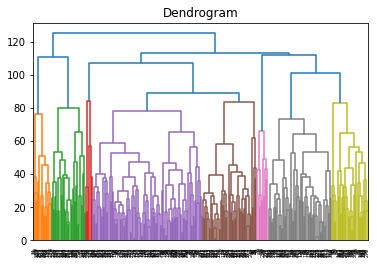

In [ ]:
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(dt, method = 'average'))
plt.title('Dendrogram')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Huh = hc_model.fit_predict(df_scale)

In [21]:
dt1 = dt.copy()
dt1['Hierarchical'] = Huh
dt1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),K-MEANS,Hierarchical
1,0,98,5,95,1,0,2,79,0,0,2,1,2,0
2,3,48,67,29,4,3,2,74,0,1,0,0,0,1
3,2,48,71,48,4,4,2,84,0,3,2,0,1,1
4,1,48,101,96,4,4,2,124,0,0,2,0,1,1
5,1,48,113,90,4,5,2,5,0,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3,32,10,64,1,0,0,114,0,3,3,2,2,0
304,2,103,93,37,3,3,0,125,0,1,3,2,0,1
305,1,72,40,23,3,1,2,50,0,1,2,0,0,1
306,3,103,38,29,3,2,2,30,0,0,2,2,0,1


In [22]:
dt1.groupby('Hierarchical').agg(
    Area_Category=('Area Category',pd.Series.mode),
    Nama_Daerah=('Nama Daerah',pd.Series.mode),
    Luas_tanah=('Luas Tanah (m2)',pd.Series.mean),
    Luas_Bangunan=('Luas Bangunan (m2)',pd.Series.mean),
    Jumlah_Kamar=('Jumlah Kamar',pd.Series.mean),
    Jumlah_Kamar_Mandi=('Jumlah Kamar Mandi',pd.Series.mean),
    Tingkat=('Tingkat/Lantai ',pd.Series.mean),
    Harga=('Harga Penawaran (dari Owner)',pd.Series.mean),
    Terjual=('Terjual/Belum',pd.Series.mode),
    Hadap=('Arah Hadap Rumah',pd.Series.mode),
    Letak=('Posisi Rumah',pd.Series.mode),
    Luas=('Lebar Jalan Depan Rumah (ROW)',pd.Series.mean), Count = ("K-MEANS",'count'))

,Area_Category,Nama_Daerah,Luas_tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Harga,Terjual,Hadap,Letak,Luas,Count
Hierarchical,,,,,,,,,,,,,
0,3,11,26.359375,82.140625,1.406250,0.515625,0.984375,84.796875,0,0,2,0.859375,64
1,3,72,62.739394,37.878788,3.333333,2.327273,1.866667,77.957576,0,1,2,0.860606,165
2,1,11,103.819444,74.819444,4.722222,3.972222,1.972222,90.541667,0,3,3,1.666667,72
